Stephanie Smith
Python API Challenge HW
WeatherPy

utilize: https://pypi.python.org/pypi/citipy

In [ ]:
#pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from config import api_key
print(api_key)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

0b3f8e2a43251d206d5aeab517c4ad2a


Generate Cities List


In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [8]:
#run a test on url structure
city = "Paris"
response = requests.get(query_url + city).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 77
    },
    "cod": 200,
    "coord": {
        "lat": 48.85,
        "lon": 2.35
    },
    "dt": 1579985217,
    "id": 2988507,
    "main": {
        "feels_like": -0.73,
        "humidity": 90,
        "pressure": 1017,
        "temp": 2.57,
        "temp_max": 5,
        "temp_min": 0.56
    },
    "name": "Paris",
    "sys": {
        "country": "FR",
        "id": 2012208,
        "sunrise": 1579937411,
        "sunset": 1579970104,
        "type": 3
    },
    "timezone": 3600,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 153,
        "speed": 2.11
    }
}


In [9]:
# set up lists to hold reponse info (will be used for df)...city already done in previous code
cityName = []
clouds = []
country = []
date = []
humidity = []
lat = []
long = []
max_temp = []
wind_speed = []


# Loop through the list of cities and perform a request for data on each
set_count = 0
start_count = 49

for count, city in enumerate(cities,1):
    try:
        response = requests.get(query_url + city).json()
        cityName.append(response["name"])
        clouds.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        if count/50==set_count+1:
            set_count=set_count+1
        print(f"Processing Record {count} of Set {set_count} | {city}")
    except:
        print(f"City not found.....skipping")
print(f"Beginning Data Retrieval")
print(f"-----------------------------")

City not found.....skipping
Processing Record 2 of Set 0 | busselton
Processing Record 3 of Set 0 | barrow
Processing Record 4 of Set 0 | filadelfia
City not found.....skipping
Processing Record 6 of Set 0 | saldanha
Processing Record 7 of Set 0 | vila velha
City not found.....skipping
Processing Record 9 of Set 0 | turukhansk
Processing Record 10 of Set 0 | kaitangata
Processing Record 11 of Set 0 | buraydah
Processing Record 12 of Set 0 | kodiak
Processing Record 13 of Set 0 | bluff
Processing Record 14 of Set 0 | vaini
Processing Record 15 of Set 0 | kavieng
Processing Record 16 of Set 0 | tiksi
Processing Record 17 of Set 0 | new norfolk
Processing Record 18 of Set 0 | hilo
Processing Record 19 of Set 0 | antalaha
Processing Record 20 of Set 0 | hohhot
Processing Record 21 of Set 0 | port alfred
Processing Record 22 of Set 0 | punta arenas
Processing Record 23 of Set 0 | ostrovnoy
Processing Record 24 of Set 0 | albany
Processing Record 25 of Set 0 | bethel
City not found.....skipp

Processing Record 207 of Set 1 | verkhniye tatyshly
Processing Record 208 of Set 1 | sakaiminato
Processing Record 209 of Set 1 | aklavik
Processing Record 210 of Set 1 | toktogul
Processing Record 211 of Set 1 | agadez
Processing Record 212 of Set 1 | concepcion
Processing Record 213 of Set 1 | sakyla
City not found.....skipping
Processing Record 215 of Set 1 | jamestown
Processing Record 216 of Set 1 | pevek
Processing Record 217 of Set 1 | milton keynes
Processing Record 218 of Set 1 | mount gambier
Processing Record 219 of Set 1 | viedma
Processing Record 220 of Set 1 | port elizabeth
City not found.....skipping
Processing Record 222 of Set 1 | san lorenzo
Processing Record 223 of Set 1 | san jeronimo
Processing Record 224 of Set 1 | verkhnevilyuysk
Processing Record 225 of Set 1 | mezhdurechenskiy
City not found.....skipping
Processing Record 227 of Set 1 | tateyama
Processing Record 228 of Set 1 | pangnirtung
City not found.....skipping
Processing Record 230 of Set 1 | loncoche
P

Processing Record 406 of Set 1 | livingston
City not found.....skipping
Processing Record 408 of Set 1 | vermilion
Processing Record 409 of Set 1 | slyudyanka
Processing Record 410 of Set 1 | arlit
Processing Record 411 of Set 1 | barranquilla
Processing Record 412 of Set 1 | chaihe
Processing Record 413 of Set 1 | hazorasp
Processing Record 414 of Set 1 | tamandare
Processing Record 415 of Set 1 | lexington
Processing Record 416 of Set 1 | abrau-dyurso
Processing Record 417 of Set 1 | port moresby
Processing Record 418 of Set 1 | caravelas
Processing Record 419 of Set 1 | hamilton
Processing Record 420 of Set 1 | cheremukhovo
Processing Record 421 of Set 1 | vestmannaeyjar
Processing Record 422 of Set 1 | roros
Processing Record 423 of Set 1 | iskateley
Processing Record 424 of Set 1 | miri
City not found.....skipping
City not found.....skipping
Processing Record 427 of Set 1 | aquiraz
Processing Record 428 of Set 1 | dimona
Processing Record 429 of Set 1 | mehamn
City not found.....s

Processing Record 606 of Set 1 | miraflores
Processing Record 607 of Set 1 | mogoytuy
Processing Record 608 of Set 1 | quatre cocos
Processing Record 609 of Set 1 | valdobbiadene
Processing Record 610 of Set 1 | buchanan
Processing Record 611 of Set 1 | ganzhou
City not found.....skipping
Processing Record 613 of Set 1 | bahia blanca
City not found.....skipping
Processing Record 615 of Set 1 | husavik
Processing Record 616 of Set 1 | maniitsoq
Processing Record 617 of Set 1 | ketchikan
Processing Record 618 of Set 1 | praia
Processing Record 619 of Set 1 | constitucion
City not found.....skipping
Processing Record 621 of Set 1 | imbituba
Processing Record 622 of Set 1 | vyshhorod
Processing Record 623 of Set 1 | fairbanks
Processing Record 624 of Set 1 | nanortalik
Processing Record 625 of Set 1 | flin flon
Processing Record 626 of Set 1 | mancora
Processing Record 627 of Set 1 | barcelos
Processing Record 628 of Set 1 | pangai
Processing Record 629 of Set 1 | cogtong
Processing Record

In [ ]:
response = requests.get(query_url + "kassala").json()
#print(json.dumps(response, indent=4, sort_keys=True))

In [11]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": cityName,
    "Cloudiness": clouds,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": long,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Busselton,1,AU,1579985335,60,-33.65,115.33,18.33,4.29
1,Barrow,1,US,1579985335,74,71.29,-156.79,-30.00,3.60
2,Philadelphia,94,US,1579985165,89,39.95,-75.16,12.22,1.34
3,Saldanha,33,ZA,1579985251,88,-33.01,17.94,17.49,3.14
4,Vila Velha,100,BR,1579985111,78,-20.33,-40.29,25.00,1.44


In [12]:
weather_data.to_csv("weatherOutput.csv", index=False, header=True)

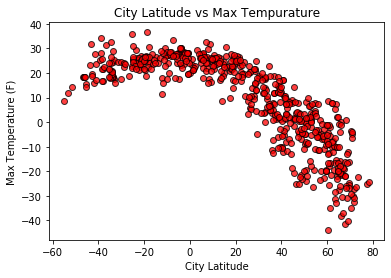

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 432x288 with 0 Axes>

In [93]:
#scatter plot lat vs temp
x_axis = weather_data['Lat']

# Create a list of data that we will use for our y values
y_axis = weather_data['Max Temp']

# The size of each point on our plot is determined by their x value
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
           alpha=0.75)
plt.title("City Latitude vs Max Tempurature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("City Latitude")
plt.show()

#save chart to a .png file
plt.savefig("cityLat_vs_windSpeed.png")
plt.show

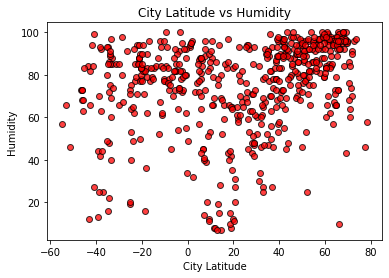

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 432x288 with 0 Axes>

In [94]:
#scatter plot lat vs temp
x_axis = weather_data['Lat']

# Create a list of data that we will use for our y values
y_axis = weather_data['Humidity']

# The size of each point on our plot is determined by their x value
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
           alpha=0.75)
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("City Latitude")
plt.show()

#save chart to a .png file
plt.savefig("cityLat_vs_humidity.png")
plt.show

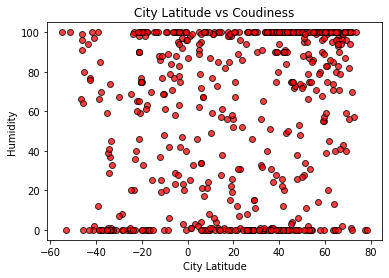

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 432x288 with 0 Axes>

In [95]:
#scatter plot lat vs cloudiness
x_axis = weather_data['Lat']

# Create a list of data that we will use for our y values
y_axis = weather_data['Cloudiness']

# The size of each point on our plot is determined by their x value
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
           alpha=0.75)
plt.title("City Latitude vs Coudiness")
plt.ylabel("Humidity")
plt.xlabel("City Latitude")
plt.show()

#save chart to a .png file
plt.savefig("cityLat_vs_cloudiness.png")
plt.show

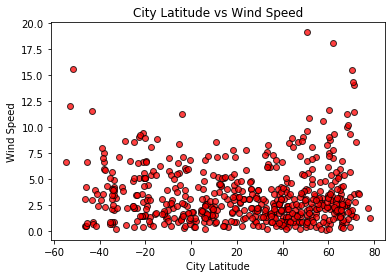

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 432x288 with 0 Axes>

In [96]:
#scatter plot lat vs cloudiness
x_axis = weather_data['Lat']

# Create a list of data that we will use for our y values
y_axis = weather_data['Wind Speed']

# The size of each point on our plot is determined by their x value
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
           alpha=0.75)
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("City Latitude")
plt.show()

#save chart to a .png file
plt.savefig("cityLat_vs_windSpeed.png")
plt.show

In [26]:
# create Northern Hemisphere
northern_df = weather_data[weather_data['Lat']>=0]
northern_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Barrow,1,US,1579985335,74,71.29,-156.79,-30.00,3.60
2,Philadelphia,94,US,1579985165,89,39.95,-75.16,12.22,1.34
5,Turukhansk,97,RU,1579985335,94,65.82,87.98,-15.69,0.89
7,Buraidah,0,SA,1579985142,45,26.33,43.98,5.93,4.79
8,Kodiak,80,US,1579985336,81,57.79,-152.41,-6.94,10.58
...,...,...,...,...,...,...,...,...,...
575,Cogtong,1,PH,1579985406,86,9.84,124.53,25.81,3.66
576,Praxedis Guerrero,0,MX,1579985406,30,31.37,-106.02,17.22,1.34
577,Bela,0,IN,1579985406,67,25.93,81.98,10.18,2.27
578,Benghazi,56,LY,1579985406,60,32.12,20.07,14.30,7.31


In [97]:
# create Southern Hemisphere
southern_df = weather_data[weather_data['Lat']<0]
southern_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Busselton,1,AU,1579985335,60,-33.65,115.33,18.33,4.29
3,Saldanha,33,ZA,1579985251,88,-33.01,17.94,17.49,3.14
4,Vila Velha,100,BR,1579985111,78,-20.33,-40.29,25.00,1.44
6,Kaitangata,91,NZ,1579985335,68,-46.28,169.85,18.33,3.06
9,Bluff,66,NZ,1579985336,73,-46.60,168.33,18.33,0.45
...,...,...,...,...,...,...,...,...,...
561,Bahia Blanca,66,AR,1579985404,25,-38.72,-62.27,28.33,7.03
566,Constitucion,0,CL,1579985283,49,-35.33,-72.42,21.45,5.08
567,Imbituba,0,BR,1579985212,67,-28.24,-48.67,23.78,2.24
572,Mancora,28,PE,1579985405,54,-4.11,-81.05,30.00,11.24


In [49]:
#create x_axis and y_axis variables for north and south hemispheres, and various charts

x_north = northern_df['Lat']
x_south = southern_df['Lat']

#create titles and variable for each chart
title1 = "Northern Hemisphere - Temperature (F) vs. Latitude"
y_north_temp = northern_df['Max Temp']

title2 = "Southern Hemisphere - Temperature (F) vs. Latitude"
y_south_temp = southern_df['Max Temp']

title3 = "Northern Hemisphere - Humidity (%) vs. Latitude"
y_north_humidity = northern_df['Humidity']

title4 = "Southern Hemisphere - Humidity (%) vs. Latitude"
y_south_humidity = southern_df['Humidity']

title5 = "Northern Hemisphere - Cloudiness (%) vs. Latitude"
y_north_clouds = northern_df['Cloudiness']

title6 = "Southern Hemisphere - Cloudiness (%) vs. Latitude"
y_south_clouds = southern_df['Cloudiness']

title7 = "Northern Hemisphere - Wind Speed (mph) vs. Latitude"
y_north_wind = northern_df['Wind Speed']

title8 = "Southern Hemisphere - Wind Speed (mph) vs. Latitude"
y_south_wind = southern_df['Wind Speed']

#create x label to be used for all charts
x_label = "Latitude"


# #Northern Hemisphere - Temperature (F) vs. Latitude

The r-squared is: -0.8584020514200984


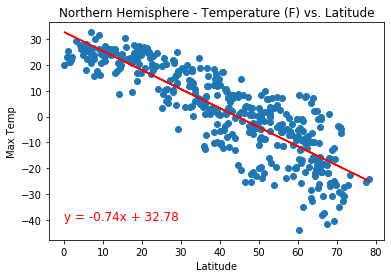

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 432x288 with 0 Axes>

In [98]:
# Create northern hemisphere - temp vs lat with linear regression and r-squared
x_values = x_north
y_values = y_north_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-40),fontsize=12,color="red")
plt.title(title1)
plt.xlabel(x_label)
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue}")
plt.show()

#save chart to a .png file
plt.savefig("northHemLat_vs_temp.png")
plt.show

# Southern Hemisphere - Temperature (F) vs. Latitude

The r-squared is: 0.44678947946953695


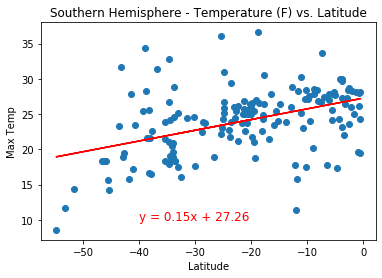

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 432x288 with 0 Axes>

In [99]:
# Create southern hemisphere - temp vs lat with linear regression and r-squared
x_values = x_south
y_values = y_south_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,10),fontsize=12,color="red")
plt.title(title2)
plt.xlabel(x_label)
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue}")
plt.show()

#save chart to a .png file
plt.savefig("southHemLat_vs_temp.png")
plt.show

# Northern Hemisphere - Humidity (%) vs. Latitude

The r-squared is: 0.4348745189321772


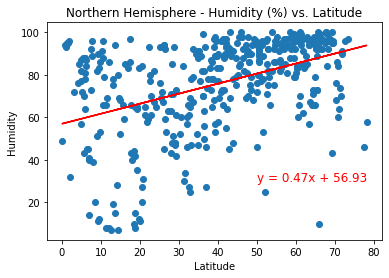

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 432x288 with 0 Axes>

In [100]:
# Create northern hemisphere - humidity vs lat with linear regression and r-squared
x_values = x_north
y_values = y_north_humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,30),fontsize=12,color="red")
plt.title(title3)
plt.xlabel(x_label)
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue}")
plt.show()

#save chart to a .png file
plt.savefig("northHemLat_vs_humidity.png")
plt.show

# Southern Hemisphere - Humidity (%) vs. Latitude

The r-squared is: 0.2540868822697453


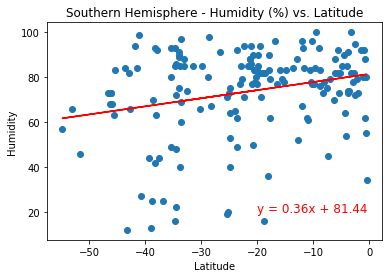

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 432x288 with 0 Axes>

In [101]:
# Create southern hemisphere - humidity vs lat with linear regression and r-squared
x_values = x_south
y_values = y_south_humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,20),fontsize=12,color="red")
plt.title(title4)
plt.xlabel(x_label)
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue}")
plt.show()

plt.savefig("southHemLat_vs_humidity.png")
plt.show

# Northern Hemisphere - Cloudiness (%) vs. Latitude

The r-squared is: 0.28608834003362343


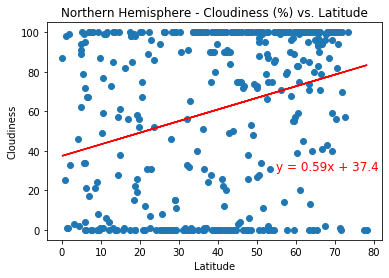

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 432x288 with 0 Axes>

In [102]:
# Create northern hemisphere - cloudiness vs lat with linear regression and r-squared
x_values = x_north
y_values = y_north_clouds
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(55,30),fontsize=12,color="red")
plt.title(title5)
plt.xlabel(x_label)
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue}")
plt.show()

plt.savefig("northHemLat_vs_cloudiness.png")
plt.show

# #Southern Hemisphere - Cloudiness (%) vs. Latitude

The r-squared is: 0.2565212842628662


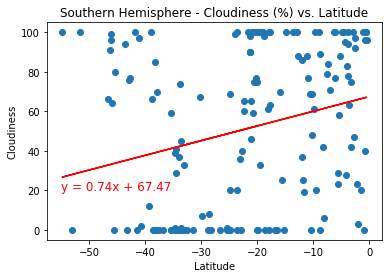

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 432x288 with 0 Axes>

In [103]:
# Create southern hemisphere - cloudiness vs lat with linear regression and r-squared
x_values = x_south
y_values = y_south_clouds
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=12,color="red")
plt.title(title6)
plt.xlabel(x_label)
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue}")
plt.show()

plt.savefig("southHemLat_vs_cloudiness.png")
plt.show

# Northern Hemisphere - Wind Speed (mph) vs. Latitude

The r-squared is: 0.16630410938224277


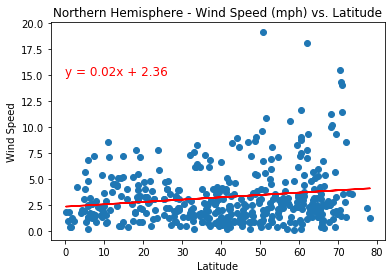

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 432x288 with 0 Axes>

In [104]:
# Create northern hemisphere - wind speed vs lat with linear regression and r-squared
x_values = x_north
y_values = y_north_wind
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,15),fontsize=12,color="red")
plt.title(title7)
plt.xlabel(x_label)
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue}")
plt.show()

plt.savefig("northHemLat_vs_windSpeed.png")
plt.show

# Southern Hemisphere - Wind Speed (mph) vs. Latitude

The r-squared is: -0.1354365516158891


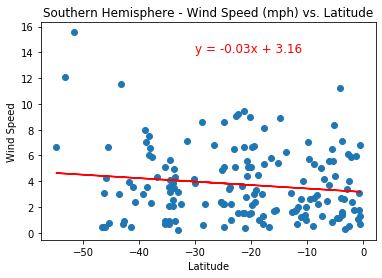

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 432x288 with 0 Axes>

In [105]:
# Create southern hemisphere - wind speed vs lat with linear regression and r-squared
x_values = x_south
y_values = y_south_wind
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,14),fontsize=12,color="red")
plt.title(title8)
plt.xlabel(x_label)
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue}")
plt.show()

plt.savefig("southHemLat_vs_windSpeed.png")
plt.show